In [4]:
%pylab inline
from nbodykit.lab import *
from nbodykit.cosmology import Planck15, LinearPower
from scipy.integrate import quad as integrate
from pmesh.pm import ParticleMesh

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, '$5^\\circ$ survey')

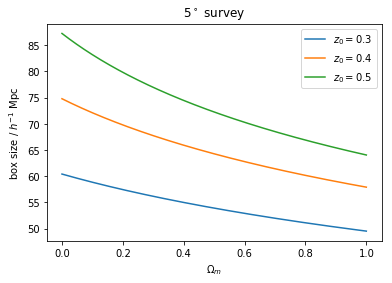

In [3]:
om = linspace(0,1,1000)
for z0 in linspace(0.3, 0.5, 3):
    boxsize = lambda m: pi/36*3e3*integrate(lambda z: ((1+z)**3*m+1-m)**-.5,0,z0)[0]/(1+z0)
    plot(om,[boxsize(o) for o in om],label=r"$z_0=%.1f$"%z0)
ylabel(r"box size / $h^{-1}$ Mpc")
xlabel(r"$\Omega_m$")
legend()
title(r"$5^\circ$ survey")

Text(0.5, 1.0, '1000 samples')

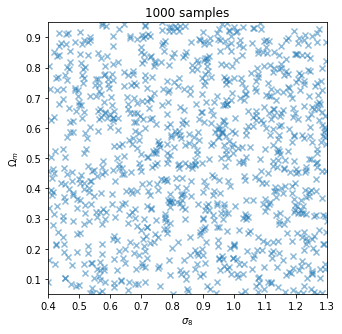

In [27]:
path = '/global/cscratch1/sd/avirukt/sims/1k/'
p = load(path+"p.npy")
figure(figsize=(5,5))
scatter(p[:,1],p[:,0],marker="x",alpha=0.5)
xlabel(r"$\sigma_8$")
ylabel(r"$\Omega_m$")
xlim(0.4,1.3)
ylim(0.05,0.95)
title("%d samples"%len(p))

In [6]:
nsims=len(p)
npix = 256
z0 = 0.4
boxsize = lambda m: pi/36*3e3*integrate(lambda z: ((1+z)**3*m+1-m)**-.5,0,z0)[0]/(1+z0)

In [8]:
k=zeros((nsims,npix,npix))
for i in range(nsims):
    pm=ParticleMesh(3*[npix],BoxSize=boxsize(p[i,0]))
    phicat = BigFileCatalog("%s%d.bigfile"%(path,i))
    Nsum = pm.paint(phicat['Positions'])
    Nsum[Nsum==0.]=1
    LFsum = pm.paint(phicat['Positions'], mass=phicat['Fields'][:,2])
    fs=LFsum / Nsum
    k[i]=fs.preview(axes=(1,0))

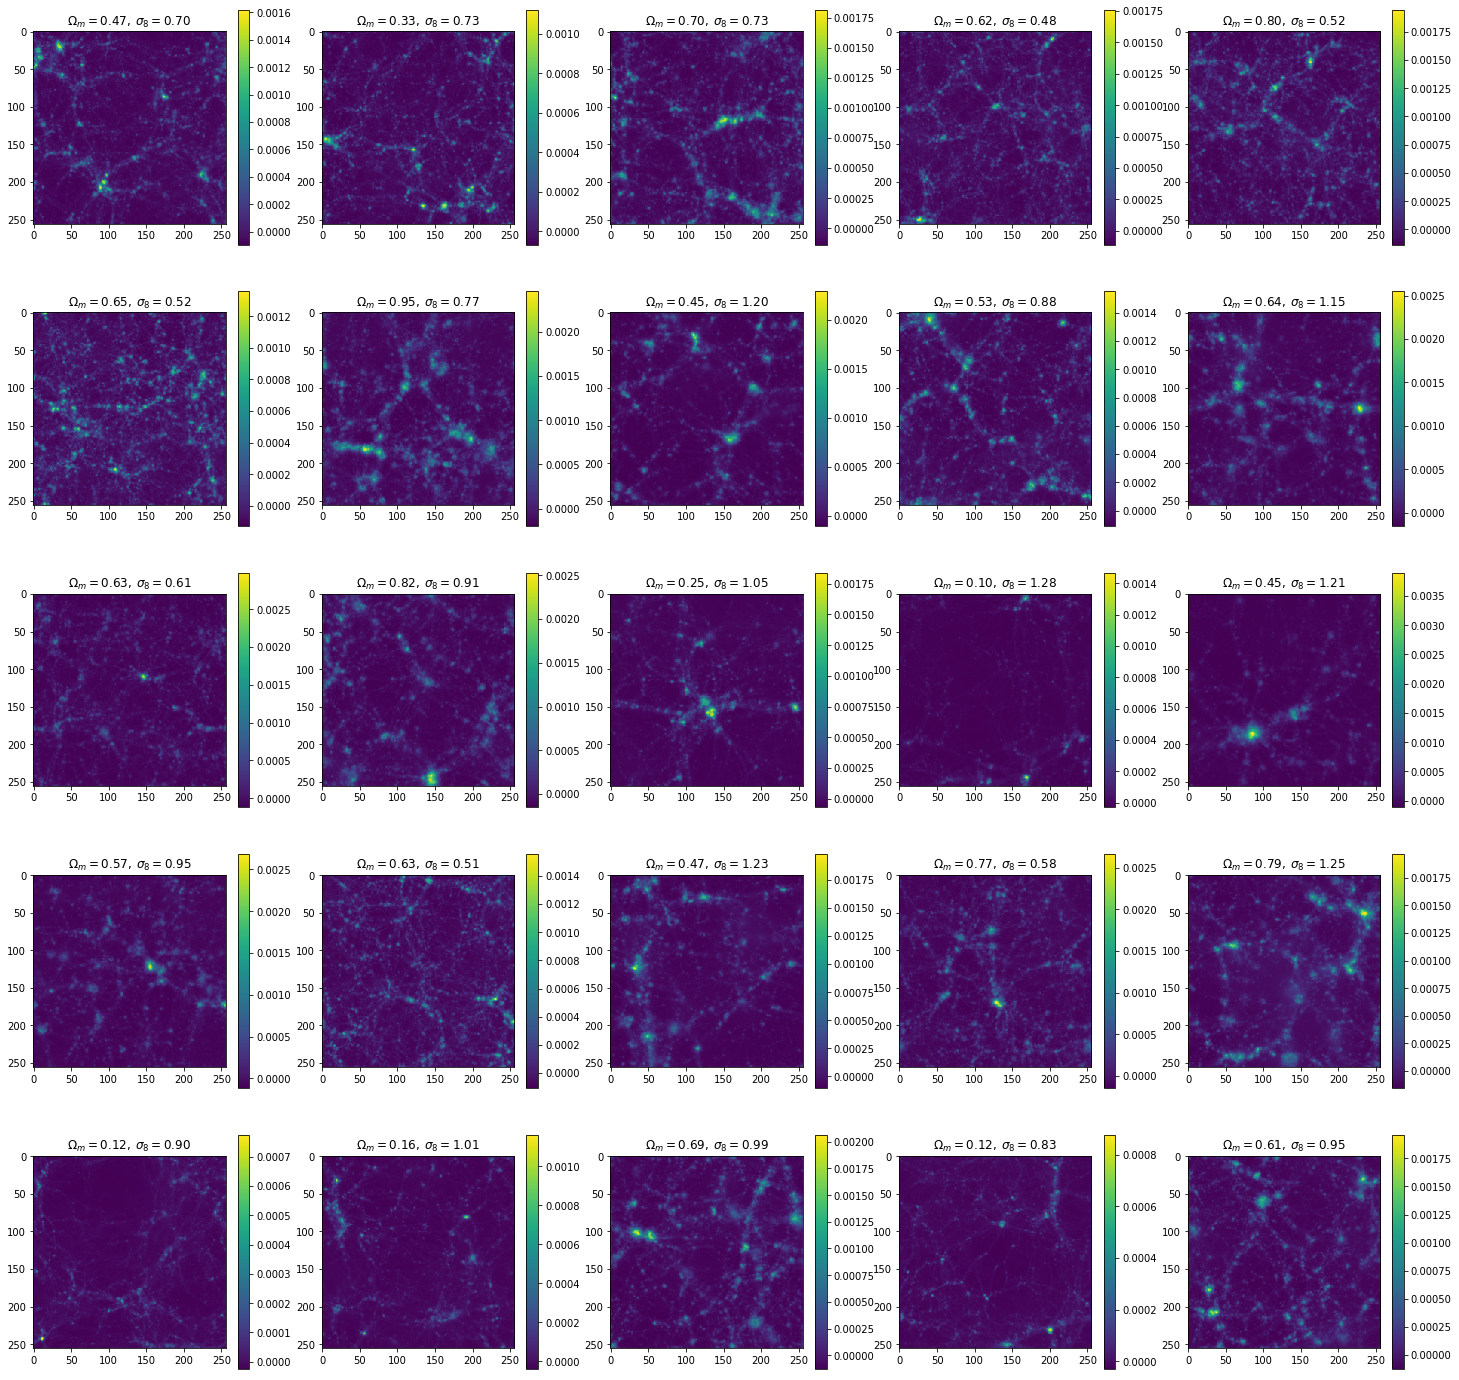

In [28]:
figure(figsize=(25,25))
for i in range(25):
    subplot(5,5,i+1)
    i = randint(nsims)
    imshow(k[i])
    colorbar()
    title(r"$\Omega_m=%.2f,\:\sigma_8=%.2f$"%tuple(p[i]))